<a href="https://colab.research.google.com/github/DiyaSReddy/EDA/blob/main/EDA_mini_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving pollution_us_2000_2016.csv to pollution_us_2000_2016 (1).csv


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Loading the dataset

In [ ]:
file_path = '/content/pollution_us_2000_2016.csv'
df = pd.read_csv(file_path)

In [ ]:
print(df.columns)

Index(['Unnamed: 0', 'State Code', 'County Code', 'Site Num', 'Address',
       'State', 'County', 'City', 'Date Local', 'NO2 Units', 'NO2 Mean',
       'NO2 1st Max Value', 'NO2 1st Max Hour', 'NO2 AQI', 'O3 Units',
       'O3 Mean', 'O3 1st Max Value', 'O3 1st Max Hour', 'O3 AQI', 'SO2 Units',
       'SO2 Mean', 'SO2 1st Max Value', 'SO2 1st Max Hour', 'SO2 AQI',
       'CO Units', 'CO Mean', 'CO 1st Max Value', 'CO 1st Max Hour', 'CO AQI'],
      dtype='object')


1. Pollution level changes over time

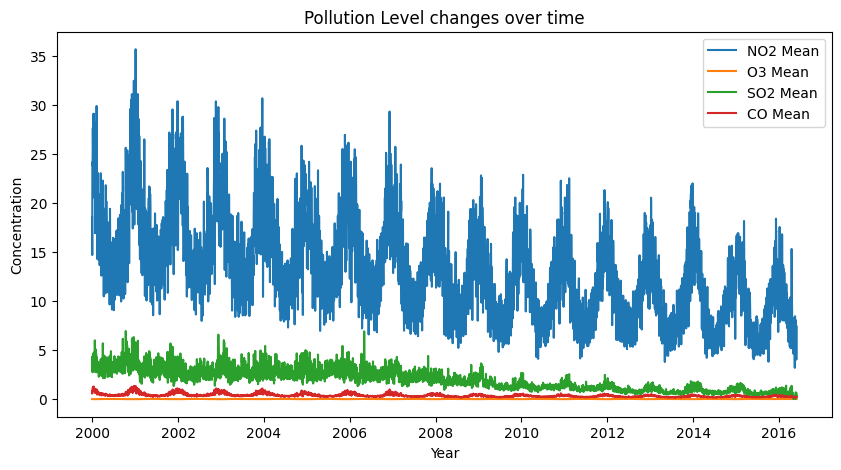

In [ ]:
df['Date Local'] = pd.to_datetime(df['Date Local'])

pollutants = ['NO2 Mean', 'O3 Mean', 'SO2 Mean', 'CO Mean']
df_grouped = df.groupby('Date Local')[pollutants].mean()
plt.figure(figsize=(10, 5))
for pollutant in pollutants:
    plt.plot(df_grouped.index, df_grouped[pollutant], label=pollutant)
plt.xlabel('Year')
plt.ylabel('Concentration')
plt.title('Pollution Level changes over time')
plt.legend()
plt.show()

2. Most polluted cities

<ipython-input-21-9fe804e35172>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cities.values, y=top_cities.index, palette="coolwarm")


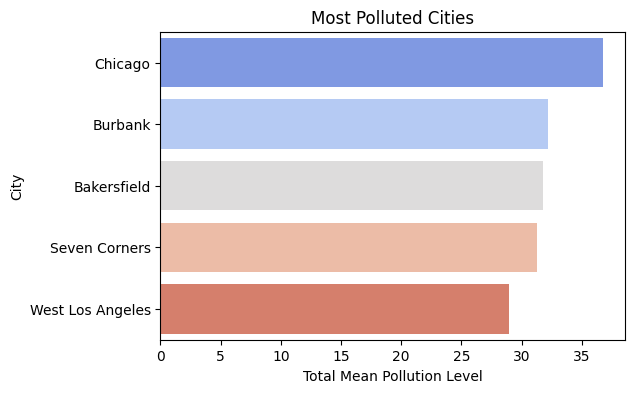

In [ ]:
city_pollution = df.groupby('City')[pollutants].mean().sum(axis=1).sort_values(ascending=False)
top_cities = city_pollution.head(5)
plt.figure(figsize=(6, 4))
sns.barplot(x=top_cities.values, y=top_cities.index, palette="coolwarm")
plt.xlabel('Total Mean Pollution Level')
plt.title('Most Polluted Cities')
plt.show()

3. Seasonal variations in air quality

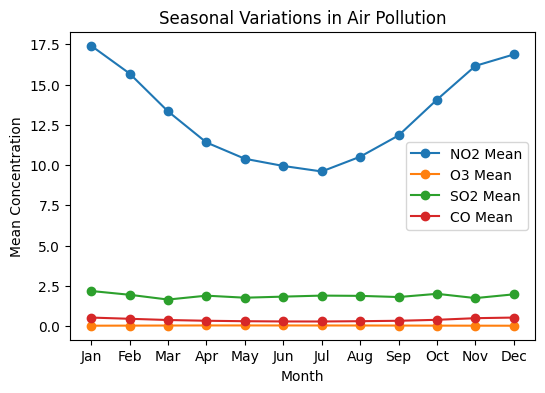

In [ ]:
df['Month'] = df['Date Local'].dt.month
seasonal_data = df.groupby('Month')[pollutants].mean()

plt.figure(figsize=(6, 4))
for pollutant in pollutants:
    plt.plot(seasonal_data.index, seasonal_data[pollutant], marker='o', label=pollutant)
plt.xlabel('Month')
plt.ylabel('Mean Concentration')
plt.title('Seasonal Variations in Air Pollution')
plt.xticks(ticks=np.arange(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend()
plt.show()

4. Temperature impact on air pollution. Columns not available in dataset.